In [96]:
import pandas as pd
import numpy as np

import os


In [3]:
df = pd.read_csv("train10k.csv")
test_data = pd.read_csv("test2k.csv")

In [4]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5506438,4.605170,Apartment,Entire home/apt,"{""Wireless Internet"",""Wheelchair accessible"",K...",3,1.0,Real Bed,flexible,False,...,40.859270,-73.929658,Spacious 1 Bd. Apt. Inwood near Fort Tryon Park,Washington Heights,0,NaN,https://a0.muscache.com/im/pictures/8d65b600-3...,10040,2.0,1.0
1,12343026,5.010635,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,True,...,40.738295,-74.006016,Lovely 1BR West Village Apartment,West Village,0,NaN,https://a0.muscache.com/im/pictures/9c1b8f62-1...,10014,1.0,1.0
2,9493786,4.077537,House,Private room,"{""Wireless Internet"",Kitchen,""Free parking on ...",3,1.5,Real Bed,moderate,True,...,40.662847,-73.946532,2. Private Room with nice queen bed,East Flatbush,0,NaN,https://a0.muscache.com/im/pictures/756d845e-3...,11225,1.0,1.0
3,9961396,5.686975,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",1,1.0,Real Bed,flexible,False,...,40.796835,-73.970703,Upper West Side Large Private Bdrm,Upper West Side,0,NaN,https://a0.muscache.com/im/pictures/106971386/...,10025,1.0,1.0
4,4820071,5.991465,Apartment,Entire home/apt,"{TV,Pool,Kitchen,Gym,Elevator,Heating,""Family/...",3,1.0,Real Bed,strict,True,...,37.782340,-122.397179,GREAT location!!!!,SoMa,4,90.0,https://a0.muscache.com/im/pictures/105087954/...,94107,1.0,1.0


In [5]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [6]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,1.000000e+04,10000.000000,10000.00000,9974.000000,10000.000000,10000.000000,10000.000000,7714.000000,9986.000000,9977.000000
mean,1.121862e+07,4.790830,3.14660,1.240525,38.426223,-92.481286,20.532900,94.106041,1.261065,1.705823
std,6.086583e+06,0.719634,2.15573,0.590796,3.078567,21.710604,36.447603,7.929820,0.846945,1.215609
min,3.362000e+03,1.609438,1.00000,0.000000,33.343287,-122.510940,0.000000,20.000000,0.000000,1.000000
25%,6.185343e+06,4.317488,2.00000,1.000000,34.127979,-118.343094,1.000000,92.000000,1.000000,1.000000
50%,1.220670e+07,4.744932,2.00000,1.000000,40.659715,-77.001433,6.000000,96.000000,1.000000,1.000000
75%,1.635534e+07,5.220356,4.00000,1.000000,40.745598,-73.954729,23.000000,100.000000,1.000000,2.000000
max,2.120388e+07,7.569412,16.00000,8.000000,42.390437,-70.985047,530.000000,100.000000,8.000000,16.000000


In [7]:
test_data.isnull().sum()

id                          0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                   7
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                 0
first_review              408
host_has_profile_pic        4
host_identity_verified      4
host_response_rate        509
host_since                  4
instant_bookable            0
last_review               407
latitude                    0
longitude                   0
name                        1
neighbourhood             191
number_of_reviews           0
review_scores_rating      426
thumbnail_url             236
zipcode                    27
bedrooms                    2
beds                        2
dtype: int64

In [8]:
df.describe(include = 'O')

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
count,10000,10000,10000,10000,10000,10000,10000,7829,9979,9979,7491,9979,10000,7833,10000,9061,8896,9870
unique,28,3,9673,5,5,6,9989,1699,2,2,66,2534,2,868,9986,483,8896,587
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,Enjoy this amazing studio in the heart of Chic...,2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,"Location, Location, Location",Williamsburg,https://a0.muscache.com/im/pictures/3fa81a24-9...,90291
freq,6604,5566,87,9748,4397,4331,2,40,9947,6744,5792,32,7460,183,3,395,1,178


In [9]:
pd.Series(df.isnull().sum().values / df.shape[0], df.isnull().sum())

0       0.0000
0       0.0000
0       0.0000
0       0.0000
0       0.0000
0       0.0000
26      0.0026
0       0.0000
0       0.0000
0       0.0000
0       0.0000
0       0.0000
2171    0.2171
21      0.0021
21      0.0021
2509    0.2509
21      0.0021
0       0.0000
2167    0.2167
0       0.0000
0       0.0000
0       0.0000
939     0.0939
0       0.0000
2286    0.2286
1104    0.1104
130     0.0130
14      0.0014
23      0.0023
dtype: float64

In [10]:
print(df.isnull().sum())
print('\n')
print(df.isnull().sum()/df.shape[0])

id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   26
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              2171
host_has_profile_pic        21
host_identity_verified      21
host_response_rate        2509
host_since                  21
instant_bookable             0
last_review               2167
latitude                     0
longitude                    0
name                         0
neighbourhood              939
number_of_reviews            0
review_scores_rating      2286
thumbnail_url             1104
zipcode                    130
bedrooms                    14
beds                        23
dtype: int64


id                        0.0000
log_price                 0.0000
property_type       

In [11]:
def fix_dtypes(df):
    #Correct the types of the data where required
    df = df.assign(
        first_review = pd.to_datetime(df.first_review),
        last_review = pd.to_datetime(df.last_review),
        host_since = pd.to_datetime(df.host_since)
    )
    return df

In [12]:
df = fix_dtypes(df)
test_data = fix_dtypes(test_data)

# Handling missing values

In [13]:
def fill_missing_values(df):
    temp_df = df.copy()
    temp_df.bathrooms.fillna(0,inplace = True)
    temp_df.dropna(subset = ['host_identity_verified','host_since'],inplace = True)
    temp_df.host_since.fillna(df.first_review)
   # df.dropna(['host_since'],inplace = True, axis =0)
    temp_df.bedrooms.fillna(0,inplace = True)
    temp_df.beds.fillna(0,inplace = True)
    temp_df.review_scores_rating.fillna(df.review_scores_rating.mean(),inplace=True)
    return temp_df

In [14]:
## for train
df = fill_missing_values(df)
## for test
test_data = fill_missing_values(test_data)

In [15]:
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5506438,4.605170,Apartment,Entire home/apt,"{""Wireless Internet"",""Wheelchair accessible"",K...",3,1.0,Real Bed,flexible,False,...,40.859270,-73.929658,Spacious 1 Bd. Apt. Inwood near Fort Tryon Park,Washington Heights,0,94.106041,https://a0.muscache.com/im/pictures/8d65b600-3...,10040,2.0,1.0
1,12343026,5.010635,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,True,...,40.738295,-74.006016,Lovely 1BR West Village Apartment,West Village,0,94.106041,https://a0.muscache.com/im/pictures/9c1b8f62-1...,10014,1.0,1.0
2,9493786,4.077537,House,Private room,"{""Wireless Internet"",Kitchen,""Free parking on ...",3,1.5,Real Bed,moderate,True,...,40.662847,-73.946532,2. Private Room with nice queen bed,East Flatbush,0,94.106041,https://a0.muscache.com/im/pictures/756d845e-3...,11225,1.0,1.0
3,9961396,5.686975,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",1,1.0,Real Bed,flexible,False,...,40.796835,-73.970703,Upper West Side Large Private Bdrm,Upper West Side,0,94.106041,https://a0.muscache.com/im/pictures/106971386/...,10025,1.0,1.0
4,4820071,5.991465,Apartment,Entire home/apt,"{TV,Pool,Kitchen,Gym,Elevator,Heating,""Family/...",3,1.0,Real Bed,strict,True,...,37.782340,-122.397179,GREAT location!!!!,SoMa,4,90.000000,https://a0.muscache.com/im/pictures/105087954/...,94107,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1399273,3.688879,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2,0.5,Futon,flexible,True,...,34.017101,-118.352206,Comfy Private Room & Bath For the Rock n Roll ...,Baldwin Hills,0,94.106041,https://a0.muscache.com/im/pictures/2b559239-1...,90008,1.0,1.0
9996,14249185,4.499810,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,40.799121,-73.952039,Cozy and Friendly Central Park Room,Harlem,49,96.000000,https://a0.muscache.com/im/pictures/5d80a486-4...,10026,1.0,1.0
9997,17098186,3.737670,Townhouse,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,flexible,True,...,34.089291,-118.145496,Convenient quiet clean room,Alhambra,19,89.000000,https://a0.muscache.com/im/pictures/696d5fa7-3...,91801,1.0,1.0
9998,9971487,4.174387,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",1,2.0,Real Bed,moderate,True,...,42.316282,-71.095636,Large room in beautiful Victorian,Roxbury,2,100.000000,https://a0.muscache.com/im/pictures/d6252bb8-d...,02119,1.0,1.0


In [16]:
type(df.room_type)

pandas.core.series.Series

In [17]:
cat_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy','cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
for cols in cat_cols:
    print(df[cols].value_counts())
    print('\n')

Apartment             6588
House                 2216
Condominium            375
Townhouse              224
Loft                   165
Other                   85
Guesthouse              71
Bed & Breakfast         60
Bungalow                57
Villa                   32
Guest suite             19
Dorm                    15
Cabin                   13
Camper/RV               12
Boutique hotel           9
Timeshare                8
Hostel                   8
In-law                   5
Boat                     5
Tent                     2
Vacation home            2
Serviced apartment       2
Chalet                   1
Treehouse                1
Castle                   1
Cave                     1
Earth House              1
Tipi                     1
Name: property_type, dtype: int64


Entire home/apt    5557
Private room       4137
Shared room         285
Name: room_type, dtype: int64


Real Bed         9727
Futon             103
Pull-out Sofa      65
Airbed             61
Couch           

# Dataset preprocessing

In [18]:
def preprocess(df):
    df.loc[df.host_has_profile_pic=='t','host_has_profile_pic']=True
    df.loc[df.host_identity_verified=='t','host_identity_verified'] = True
    df.loc[df.instant_bookable == 't','instant_bookable'] = True
    df.loc[df.host_has_profile_pic=='f','host_has_profile_pic']=False
    df.loc[df.host_identity_verified=='f','host_identity_verified'] = False
    df.loc[df.instant_bookable == 'f','instant_bookable'] = False
    
    df.loc[df.cancellation_policy=='super_strict_30','cancellation_policy']='strict'
    df.loc[df.cancellation_policy=='super_strict_60','cancellation_policy']= 'strict'
    
    def recode_prop(value):
        if value not in ['House', 'Apartment','Condominium','Townhouse','Loft']:
            return 'other_prop_type'
        return value

    df['property_type'] = df['property_type'].apply(recode_prop)
    
    df["host_response_rate"] = df.host_response_rate.str.strip('%').astype(float)/100
    
    df['bedroom_share'] = df.bedrooms/df.accommodates
    df['bathroom_share'] = df.bathrooms/df.accommodates
    
    df['year_of_listing'] = df.host_since.dt.year
    df['month_of_listing'] = df.host_since.dt.month
    
    
    #df.drop(['beds', 'bedrooms', 'bathrooms', 'first_review','last_review','zipcode'], axis =1, inplace = True)
    
    return df

In [19]:
## for train
df = preprocess(df)
df['price'] = np.exp(df['log_price'])

In [20]:
## for test
test_data = preprocess(test_data)

# Dummifying categorical features

In [21]:
def dummy(df):
    cat_cols = ['room_type', 'city', 'property_type', 'bed_type', 'cancellation_policy']
    df = pd.get_dummies(columns=cat_cols, data=df,prefix=cat_cols, prefix_sep="_", drop_first=True)    
    return df

In [22]:
df = dummy(df)
test_data = dummy(test_data)

In [95]:
df.loc[df['amenities'] == '{}','amenities'] = ""

# preprocessing amenities

In [25]:
def preprocess_amenities(df):
    df.loc[df['amenities'] == '{}','amenities'] = ""

#Remove the symbols and one hot encode the amenities feature
    df['amenities'] = df['amenities'].map(
        lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")]))

    amenities = np.unique(np.concatenate(df['amenities'].map(lambda amns: amns.split("|")).values))

    amenities_matrix = np.array([df['amenities'].map(lambda amns: amn in amns).values for amn in amenities])
    amen=pd.DataFrame(data=amenities_matrix.T, columns=amenities)
    return amen

In [26]:
## for train
amen = preprocess_amenities(df)
## for test
amen_test = preprocess_amenities(test_data)

In [27]:
amen

,,smooth pathway to front door,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,BBQ grill,Baby bath,Baby monitor,...,Wheelchair accessible,Wide clearance to bed,Wide clearance to shower & toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
9975,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
9976,True,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9977,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [28]:
## for train
listings_amenities = pd.concat([amen,df[['id','log_price']]], axis=1)
## for test
listings_amenities_test = pd.concat([amen_test,test_data[['id']]], axis=1)

In [29]:
listings_amenities.head()

,,smooth pathway to front door,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,BBQ grill,Baby bath,Baby monitor,...,Wide clearance to shower & toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,id,log_price
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,5506438.0,4.605170
1,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,12343026.0,5.010635
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,9493786.0,4.077537
3,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,9961396.0,5.686975
4,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4820071.0,5.991465


In [30]:
#Remove junk amenities from the created features

## for train
listings_amenities=listings_amenities.drop(columns=['','translation missing: en.hosting_amenity_49','translation missing: en.hosting_amenity_50'])
## for test
listings_amenities_test = listings_amenities_test.drop(columns=['','translation missing: en.hosting_amenity_49','translation missing: en.hosting_amenity_50'])

In [31]:
#Convert the amenities table into long format

## for train
listings_amenities_long = listings_amenities.melt(id_vars=['id', 'log_price'], var_name='amenity')
## for test
listings_amenities_long_test = listings_amenities_test.melt(id_vars=['id'], var_name='amenity')

In [32]:
listings_amenities_long.head()

,id,log_price,amenity,value
0,5506438.0,4.605170,smooth pathway to front door,False
1,12343026.0,5.010635,smooth pathway to front door,False
2,9493786.0,4.077537,smooth pathway to front door,False
3,9961396.0,5.686975,smooth pathway to front door,False
4,4820071.0,5.991465,smooth pathway to front door,False


In [33]:
amenity_counts = listings_amenities.drop(['id','log_price'], axis = 1).sum(axis = 0)

In [34]:
amenity_counts

 smooth pathway to front door      52.0
24-hour check-in                 2575.0
Accessible-height bed              50.0
Accessible-height toilet           38.0
Air conditioning                 7442.0
                                  ...  
Wide doorway                       69.0
Wide entryway                      39.0
Wide hallway clearance             54.0
Window guards                      83.0
Wireless Internet                9566.0
Length: 120, dtype: float64

In [35]:
amenity_counts.sort_values(ascending = False)[['Flat',' smooth pathway to front door']]

Flat                             52.0
 smooth pathway to front door    52.0
dtype: float64

In [36]:
# The Dictionary for Recoding Amenities

## The original Amenities grouped by their nature.
amenitiy_recodings = {
    'Flat' : 'Accessible Room',
    ' smooth pathway to front door' : 'Accessible Room',
    'Accessible-height bed' : 'Accessible Room', 
    'Accessible-height toilet'  : 'Accessible Room',
    'Flat smooth pathway to front door'  : 'Accessible Room',
    'Fixed grab bars for shower & toilet'  : 'Accessible Room',
    'Grab-rails for shower and toilet'  : 'Accessible Room', 
    'Step-free access'  : 'Accessible Room',
    'Wheelchair accessible'  : 'Accessible Room',
    'Wide clearance to bed'  : 'Accessible Room', 
    'Wide clearance to shower & toilet'  : 'Accessible Room',
    'Wide clearance to shower and toilet'  : 'Accessible Room',
    'Wide doorway'  : 'Accessible Room',
    'Wide entryway'  : 'Accessible Room', 
    'Wide hallway clearance'  : 'Accessible Room',
    'Roll-in shower with chair'  : 'Accessible Room',
    'Bathtub with shower chair'  : 'Accessible Room',
    'Disabled parking spot'  : 'Accessible Room',
    'Ground floor access'  : 'Accessible Room',
    'Handheld shower head'  : 'Accessible Room',
    
    'Cat(s)' : 'Pet Friendly',
    'Other pet(s)' : 'Pet Friendly',
    'Pets allowed' : 'Pet Friendly',
    'Dog(s)' : 'Pet Friendly',
    'Pets live on this property' : 'Pet Friendly', 
    
    'Table corner guards' : 'Family/kid friendly',
    'Fireplace guards' : 'Family/kid friendly',
    'Childrenâ€™s books and toys' : 'Family/kid friendly',
    'Childrenâ€™s dinnerware' : 'Family/kid friendly', 
    'Outlet covers' : 'Family/kid friendly',
    'Babysitter recommendations' : 'Family/kid friendly',
    'Window guards' : 'Family/kid friendly',
    
    'Baby bath': 'Baby Friendly',
    'Baby monitor': 'Baby Friendly',
    'Pack â€™n Play/travel crib': 'Baby Friendly',
    'Crib': 'Baby Friendly', 
    'Changing table': 'Baby Friendly',
    'Stair gates': 'Baby Friendly',
    'High chair': 'Baby Friendly',
       
    
    'Doorman': 'Security',
    'Doorman Entry': 'Security',
    'Buzzer/wireless intercom': 'Security',
    'Smart lock': 'Security', 
    'Smartlock': 'Security',
    'Keypad': 'Security', 
    
    'Internet' : 'Internet',
    'Pocket wifi' : 'Internet',
    'Wireless Internet' : 'Internet',
    'Ethernet connection' : 'Internet',
    
    'Self Check-In' : '24-hour check-in',
    '24-hour check-in': '24-hour check-in',
    'Luggage dropoff allowed': '24-hour check-in',
    
    'Free parking on premises' : 'Free parking',
    'Free parking on street' : 'Free parking',
    
    'Paid parking off premises' : 'Paid parking',
    
    #'EV charger',
    
    #'Elevator',
    'Elevator in building' : 'Elevator', 
    
    'Lake access' : 'Near Water',
    'Beachfront': 'Near Water',
    'Beach essentials': 'Near Water',
    'Waterfront': 'Near Water',
    
    'Cooking basics' : 'Cooking Allowed', 
    'Dishes and silverware' : 'Cooking Allowed', 
    'Dishwasher' : 'Cooking Allowed',
    'Microwave' : 'Cooking Allowed', 
    'Oven' : 'Cooking Allowed',
    'BBQ grill' : 'Cooking Allowed',
    'Stove' : 'Cooking Allowed', 
    'Kitchen' : 'Cooking Allowed',
    #'Refrigerator', 
    
    #'Coffee maker', 
    
    'Cable TV' : 'TV', 
    #'TV',
    
    #'Game console', 
    
    'Private bathroom' : "Privacy Centric", 
    'Private entrance' : "Privacy Centric",
    'Private living room' : "Privacy Centric",
    'Lock on bedroom door' : "Privacy Centric",
       
    'Dryer' : "Laundry Facility", 
    'Washer' : "Laundry Facility", 
    'Washer / Dryer' : "Laundry Facility",
    
    #'Iron', 
    #'Hangers', 
    
    #'Breakfast',
    
    'First aid kit' : 'Fire and Safety Features',
    'Carbon monoxide detector' : 'Fire and Safety Features',
    'Smoke detector' : 'Fire and Safety Features',
    'Fire extinguisher' : 'Fire and Safety Features', 
    'Safety card' : 'Fire and Safety Features',
    
    'Path to entrance lit at night' : 'Outdoor Lighting', 
    'Well-lit path to entrance' : 'Outdoor Lighting',
    
    'Air conditioning' : 'Climate Control',
    'Heating' : 'Climate Control', 
    'Indoor fireplace' : 'Climate Control', 
    
    #'Gym',
    
    'Body soap' : 'Essentials', 
    'Bath towel' : 'Essentials',
    'Bed linens' : 'Essentials', 
    'Hand or paper towel' : 'Essentials', 
    'Hand soap' : 'Essentials',
    'Shampoo' : 'Essentials',
    'Toilet paper' : 'Essentials',
    'Essentials' : 'Essentials',
    
    #'Cleaning before checkout',
    
    #'Patio or balcony', 
    #'Garden or backyard',
    
    'Bathtub' :'Bathtub',
    'Hot tub' : 'Bathtub', 
     
    
    'Hot water' : 'Hot water', 
    'Hot water kettle' : 'Hot water',
    
    #'Host greets you', 
    
    'Extra pillows and blankets' : 'Comfortable Sleep',
    'Firm matress' : 'Comfortable Sleep',
    'Firm mattress' : 'Comfortable Sleep',
    'Room-darkening shades' : 'Comfortable Sleep'
    #'Hair dryer',
    #'Laptop friendly workspace',
    #'Lockbox', 
    #'Long term stays allowed', 
    #'Pool',
    #'Single level home', 
    #'Ski in/Ski out', 

    #'Smoking allowed', 

    #'Suitable for events'
    }


In [37]:
## for train
listings_amenities_long = listings_amenities_long.assign(
    amenity_modified = listings_amenities_long.amenity.replace(amenitiy_recodings)
)
## for test
listings_amenities_long_test = listings_amenities_long_test.assign(
    amenity_modified = listings_amenities_long_test.amenity.replace(amenitiy_recodings)
)

listings_amenities_long.head()

,id,log_price,amenity,value,amenity_modified
0,5506438.0,4.605170,smooth pathway to front door,False,Accessible Room
1,12343026.0,5.010635,smooth pathway to front door,False,Accessible Room
2,9493786.0,4.077537,smooth pathway to front door,False,Accessible Room
3,9961396.0,5.686975,smooth pathway to front door,False,Accessible Room
4,4820071.0,5.991465,smooth pathway to front door,False,Accessible Room


In [38]:
## for train
listings_amenities_simplified = listings_amenities_long.pivot_table(
    index='id',
    columns='amenity_modified',
    values='value', 
    aggfunc='max'
)
## for test
listings_amenities_simplified_test = listings_amenities_long_test.pivot_table(
    index='id',
    columns='amenity_modified',
    values='value', 
    aggfunc='max'
)

In [39]:
listings_amenities_simplified.head()

amenity_modified,24-hour check-in,Accessible Room,Air purifier,Baby Friendly,Bathtub,Breakfast,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Climate Control,...,Pet Friendly,Pool,Privacy Centric,Refrigerator,Security,Single level home,Ski in/Ski out,Smoking allowed,Suitable for events,TV
id,,,,,,,,,,,,,,,,,,,,,
3362.0,False,False,False,False,True,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
4002.0,True,False,False,False,False,True,False,False,False,True,...,True,False,True,False,False,False,False,False,False,True
4197.0,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,True
5099.0,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
5203.0,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True


In [40]:
## for train 
listings_amenities_simplified = listings_amenities_simplified.merge(
    df.loc[:,['id','log_price']], 
    how = "inner", 
    on = "id"
)
## for test
listings_amenities_simplified_test = listings_amenities_simplified_test.merge(
    test_data.loc[:,['id']], 
    how = "inner", 
    on = "id"
)

In [41]:
listings_amenities_simplified_test.head()

,id,24-hour check-in,Accessible Room,Baby Friendly,Bathtub,Breakfast,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Climate Control,...,Pet Friendly,Pool,Privacy Centric,Refrigerator,Security,Single level home,Ski in/Ski out,Smoking allowed,Suitable for events,TV
0,5728.0,True,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
1,7816.0,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,8490.0,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
3,11374.0,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,14694.0,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True


In [42]:
## for train
listings_selected_amenities = pd.concat(
        [
            listings_amenities_simplified['id'], 
            listings_amenities_simplified.loc[:,listings_amenities_simplified.columns != 'id'].astype(int)
        ],
        axis=1
    )
## for test
listings_selected_amenities_test = pd.concat(
        [
            listings_amenities_simplified_test['id'], 
            listings_amenities_simplified_test.loc[:,listings_amenities_simplified_test.columns != 'id'].astype(int)
        ],
        axis=1
    )

In [43]:
listings_selected_amenities.head()

,id,24-hour check-in,Accessible Room,Air purifier,Baby Friendly,Bathtub,Breakfast,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,...,Pool,Privacy Centric,Refrigerator,Security,Single level home,Ski in/Ski out,Smoking allowed,Suitable for events,TV,log_price
0,3362.0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,4
1,4002.0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,4
2,4197.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,3
3,5099.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
4,5203.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,4


In [44]:
listings = df.merge(listings_selected_amenities.drop('log_price', axis = 1), how = "inner", on = "id")
listings_test = test_data.merge(listings_selected_amenities_test,  how = "inner", on = "id")

In [45]:
listings_test.shape

(1992, 92)

In [46]:
listings.head()

,id,log_price,amenities,accommodates,bathrooms,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,...,Pet Friendly,Pool,Privacy Centric,Refrigerator,Security,Single level home,Ski in/Ski out,Smoking allowed,Suitable for events,TV
0,5506438,4.605170,Wireless Internet|Wheelchair accessible|Kitche...,3,1.0,False,Large apartment with a lot of natural light ne...,NaT,True,True,...,0,0,0,0,1,0,0,0,0,0
1,12343026,5.010635,TV|Cable TV|Internet|Wireless Internet|Air con...,2,1.0,True,This is a true one-bedroom apartment in the be...,NaT,True,True,...,1,0,0,0,1,0,0,1,0,1
2,9493786,4.077537,Wireless Internet|Kitchen|Free parking on prem...,3,1.5,True,My place is close to Prospect Park and Phat Al...,NaT,False,False,...,0,0,0,0,0,0,0,0,0,0
3,9961396,5.686975,Cable TV|Internet|Wireless Internet|Air condit...,1,1.0,False,Upper West Side private 1 bedroom fully furnis...,NaT,True,False,...,0,0,0,0,1,0,0,0,0,1
4,4820071,5.991465,TV|Pool|Kitchen|Gym|Elevator|Heating|Family/ki...,3,1.0,True,"1 bed, 1 bath in Downtown SF near Union Square...",2015-09-17,True,True,...,0,1,0,0,0,0,0,0,0,1


In [47]:
listings.dtypes

id                       int64
log_price              float64
amenities               object
accommodates             int64
bathrooms              float64
                        ...   
Single level home        int32
Ski in/Ski out           int32
Smoking allowed          int32
Suitable for events      int32
TV                       int32
Length: 95, dtype: object

In [48]:
listings.drop(['host_since'], axis = 1, inplace = True)
listings_test.drop(['host_since'], axis = 1, inplace = True)
listings.drop(['latitude','longitude'],axis=1,inplace = True)
listings_test.drop(['latitude','longitude'],axis=1,inplace = True)

In [49]:
list(listings)

['id',
 'log_price',
 'amenities',
 'accommodates',
 'bathrooms',
 'cleaning_fee',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'number_of_reviews',
 'review_scores_rating',
 'thumbnail_url',
 'zipcode',
 'bedrooms',
 'beds',
 'bedroom_share',
 'bathroom_share',
 'year_of_listing',
 'month_of_listing',
 'price',
 'room_type_Private room',
 'room_type_Shared room',
 'city_Chicago',
 'city_DC',
 'city_LA',
 'city_NYC',
 'city_SF',
 'property_type_Condominium',
 'property_type_House',
 'property_type_Loft',
 'property_type_Townhouse',
 'property_type_other_prop_type',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 '24-hour check-in',
 'Accessible Room',
 'Air purifier',
 'Baby Friendly',
 'Bathtub',
 'Breakfast',
 'Children’s books and toys',
 'Children’s dinn

# Data visualization

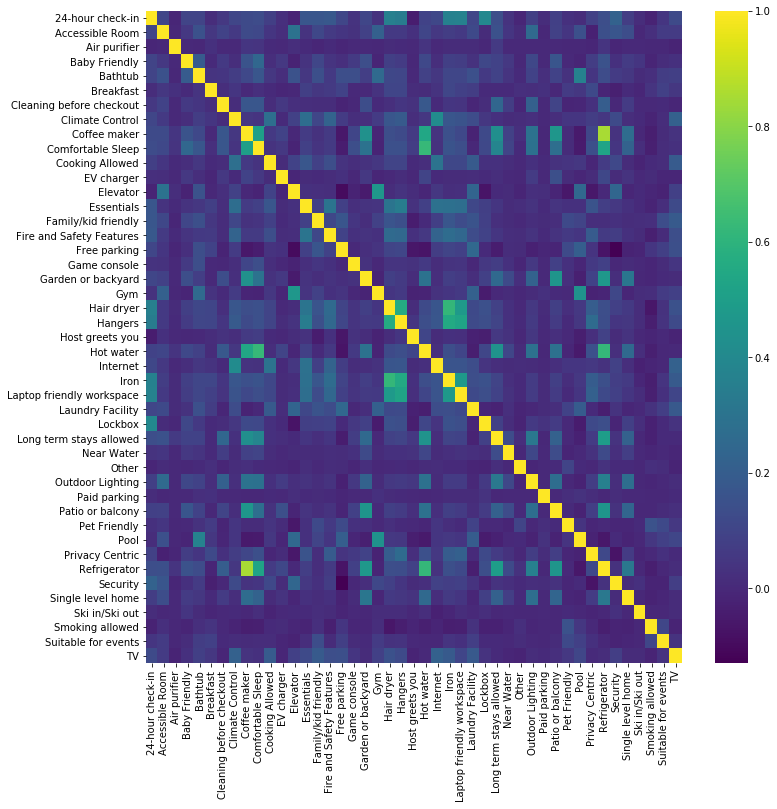

In [50]:
## Generating the heatmap for visualization - using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
listings_selected_amenities = listings[['24-hour check-in', 'Accessible Room', 'Air purifier',
       'Baby Friendly', 'Bathtub', 'Breakfast', 'Cleaning before checkout',
       'Climate Control', 'Coffee maker', 'Comfortable Sleep',
       'Cooking Allowed', 'EV charger', 'Elevator', 'Essentials',
       'Family/kid friendly', 'Fire and Safety Features', 'Free parking',
       'Game console', 'Garden or backyard', 'Gym', 'Hair dryer', 'Hangers',
       'Host greets you', 'Hot water', 'Internet', 'Iron',
       'Laptop friendly workspace', 'Laundry Facility', 'Lockbox',
       'Long term stays allowed', 'Near Water', 'Other', 'Outdoor Lighting',
       'Paid parking', 'Patio or balcony', 'Pet Friendly', 'Pool', 'Privacy Centric', 'Refrigerator',
       'Security', 'Single level home', 'Ski in/Ski out', 'Smoking allowed',
       'Suitable for events', 'TV']]
fig = plt.figure(figsize= (12,12))
sns.heatmap(listings_selected_amenities.corr(), annot=False, vmax=1, cmap='viridis', square=False)

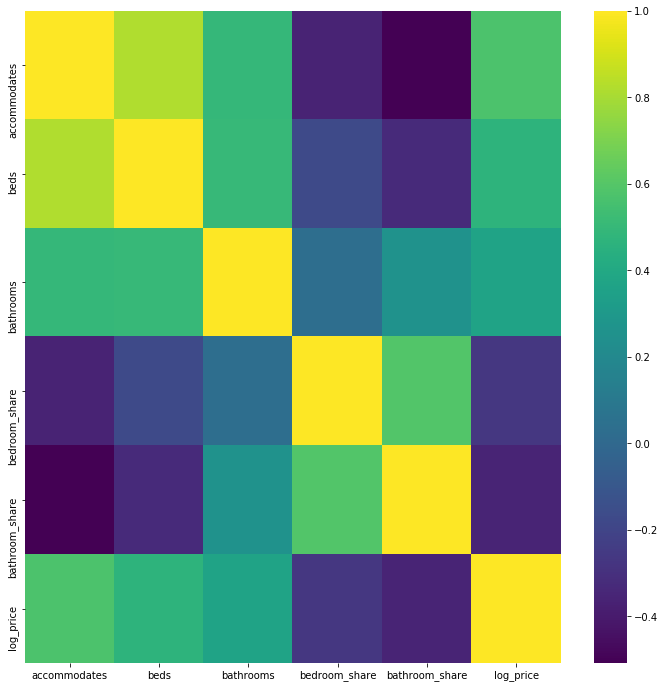

In [51]:
## Generating the heatmap for visualization - using Seaborn
listings_selected_amenities = listings[[
    'accommodates', 
    'beds','bathrooms',
    'bedroom_share','bathroom_share',
    'log_price'
]]
fig = plt.figure(figsize= (12,12))
sns.heatmap(listings_selected_amenities.corr(), annot=False, vmax=1, cmap='viridis', square=False)

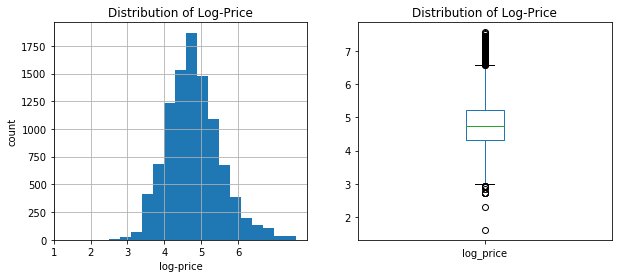

In [52]:
# The Log Price column
fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

listings.log_price.hist(ax = ax1, bins = 20)
ax1.set_title('Distribution of Log-Price')
ax1.set_xlabel('log-price')
ax1.set_ylabel('count')
ax1.set_xticks(range(1,7,1))

# The Log Price column
plot = listings.log_price.plot(kind = 'box', ax = ax2)
ax2.set_title('Distribution of Log-Price')

plt.show()

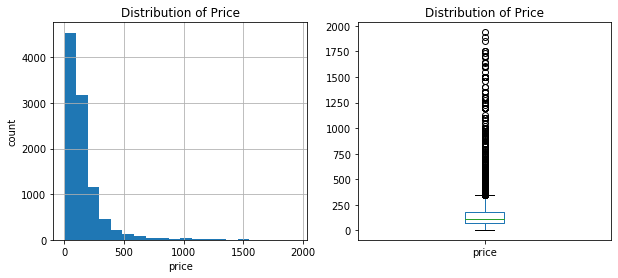

In [53]:
fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

listings.price.hist(ax = ax1, bins = 20)
ax1.set_title('Distribution of Price')
ax1.set_xlabel('price')
ax1.set_ylabel('count')

# The Log Price column
plot = listings.price.plot(kind = 'box', ax = ax2)
ax2.set_title('Distribution of Price')

plt.show()

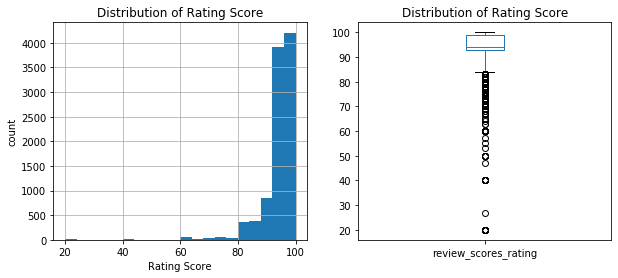

In [54]:
fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

listings.review_scores_rating.hist(ax = ax1, bins = 20)
ax1.set_title('Distribution of Rating Score')
ax1.set_xlabel('Rating Score')
ax1.set_ylabel('count')

# The Log Price column
plot = listings.review_scores_rating.plot(kind = 'box', ax = ax2)
ax2.set_title('Distribution of Rating Score')

plt.show()

In [55]:
list(listings_test)

['id',
 'amenities',
 'accommodates',
 'bathrooms',
 'cleaning_fee',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'number_of_reviews',
 'review_scores_rating',
 'thumbnail_url',
 'zipcode',
 'bedrooms',
 'beds',
 'bedroom_share',
 'bathroom_share',
 'year_of_listing',
 'month_of_listing',
 'room_type_Private room',
 'room_type_Shared room',
 'city_Chicago',
 'city_DC',
 'city_LA',
 'city_NYC',
 'city_SF',
 'property_type_Condominium',
 'property_type_House',
 'property_type_Loft',
 'property_type_Townhouse',
 'property_type_other_prop_type',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 '24-hour check-in',
 'Accessible Room',
 'Baby Friendly',
 'Bathtub',
 'Breakfast',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'C

In [56]:
train_cols = [
    'accommodates',
    'beds','bathrooms',
    'cleaning_fee',
    'city_Chicago','city_DC','city_LA','city_NYC','city_SF','room_type_Private room','room_type_Shared room',
    'property_type_Condominium','property_type_House','property_type_Loft','property_type_Townhouse','property_type_other_prop_type',
    'cancellation_policy_moderate','cancellation_policy_strict','instant_bookable']


In [57]:
x = listings[train_cols]
y = listings['log_price']

In [58]:
y.head()

0    4.605170
1    5.010635
2    4.077537
3    5.686975
4    5.991465
Name: log_price, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [61]:
#Min Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling without amenities

### Linear regression

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lm = LinearRegression()

# Fit the model on to the training data( Train the model ).
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
lm_train_pred = lm.predict(X_train)
lm_test_pred = lm.predict(X_test)

In [65]:
lm_test_pred

array([5.58340752, 5.22717133, 5.54466464, ..., 4.29079459, 4.18445326,
       6.66371632])

In [66]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [67]:
print("Root Mean Squared Error for train : %0.3f" % mean_squared_error(np.exp(y_train),np.exp(lm_train_pred))**0.5)
print("Root Mean Squared Error for test : %0.3f" % mean_squared_error(np.exp(y_test),np.exp(lm_test_pred))**0.5)

Root Mean Squared Error for train : 133.513
Root Mean Squared Error for test : 146.387


## Modeling with amenities

In [68]:
train_cols_amen = ['accommodates',
    'beds','bathrooms',
    'cleaning_fee',
    'city_Chicago','city_DC','city_LA','city_NYC','city_SF','room_type_Private room','room_type_Shared room',
    'property_type_Condominium','property_type_House','property_type_Loft','property_type_Townhouse','property_type_other_prop_type',
    'cancellation_policy_moderate','cancellation_policy_strict','instant_bookable'
    
    '24-hour check-in', 'Accessible Room', 'Air purifier',
    'Baby Friendly', 'Bathtub', 'Breakfast', 'Cleaning before checkout',
    'Climate Control', 'Coffee maker', 'Comfortable Sleep',
    'Cooking Allowed', 'EV charger', 'Elevator', 'Essentials',
    'Family/kid friendly', 'Fire and Safety Features', 'Free parking',
    'Game console', 'Garden or backyard', 'Gym', 'Hair dryer', 'Hangers',
    'Host greets you', 'Hot water', 'Internet', 'Iron',
    'Laptop friendly workspace', 'Laundry Facility', 'Lockbox',
    'Long term stays allowed', 'Near Water', 'Other', 'Outdoor Lighting',
    'Paid parking', 'Patio or balcony', 'Pet Friendly',
    'Pets live on this property', 'Pool', 'Privacy Centric', 'Refrigerator',
    'Security', 'Single level home', 'Ski in/Ski out', 'Smoking allowed',
    'Suitable for events', 'TV']



In [69]:
x_amen = listings[train_cols]
y_amen = listings['log_price']

In [70]:
X_train_amen, X_test_amen, y_train_amen, y_test_amen = train_test_split(x_amen, y_amen, test_size=0.20)

In [71]:
scaler = MinMaxScaler()
X_train_amen = scaler.fit_transform(X_train_amen)
X_test_amen = scaler.transform(X_test_amen)

### Linear regression

In [72]:
lm = LinearRegression()

# Fit the model on to the training data( Train the model ).
lm.fit(X_train_amen, y_train_amen)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
lm_train_pred_amen = lm.predict(X_train_amen)
lm_test_pred_amen = lm.predict(X_test_amen)

In [74]:
print("Root Mean Squared Error for train : %0.3f" % mean_squared_error(np.exp(y_train_amen),np.exp(lm_train_pred_amen))**0.5)
print("Root Mean Squared Error for test : %0.3f" % mean_squared_error(np.exp(y_test_amen),np.exp(lm_test_pred_amen))**0.5)

Root Mean Squared Error for train : 133.866
Root Mean Squared Error for test : 144.871


# Random forest

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
#Create a random forest classifier
clf = RandomForestRegressor(max_depth=10, n_estimators=100)

#Train the classifier
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [77]:
clf_train_pred = clf.predict(X_train)
clf_test_pred = clf.predict(X_test)

In [78]:
print("Root Mean Squared Error for train : %0.3f" % mean_squared_error(np.exp(y_train),np.exp(clf_train_pred))**0.5)
print("Root Mean Squared Error for test : %0.3f" % mean_squared_error(np.exp(y_test),np.exp(clf_test_pred))**0.5)

Root Mean Squared Error for train : 108.542
Root Mean Squared Error for test : 143.036


## RF grid search

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
rfc = RandomForestRegressor(n_jobs=-1, max_features='sqrt') 
param_grid = {"n_estimators" : [50,100],
              "max_depth" : [5,8,10],
              "min_samples_leaf" : [4,8,12],
             "min_samples_split": [2, 10, 20]}

rf_grid = GridSearchCV(rfc, param_grid=param_grid, cv=5)

In [81]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [82]:
rf_train_pred = rf_grid.predict(X_train)
rf_test_pred = rf_grid.predict(X_test)

In [83]:
rf_test_pred

array([5.66159098, 5.09560913, 5.76249449, ..., 4.23991498, 4.20116211,
       5.80140063])

In [84]:
print("Root Mean Squared Error for train : %0.3f" % mean_squared_error(np.exp(y_train),np.exp(rf_train_pred))**0.5)
print("Root Mean Squared Error for test : %0.3f" % mean_squared_error(np.exp(y_test),np.exp(rf_test_pred))**0.5)

Root Mean Squared Error for train : 126.205
Root Mean Squared Error for test : 145.642


### RF with amenities

In [85]:
rf_grid.fit(X_train_amen, y_train_amen)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [86]:
rf_train_pred = rf_grid.predict(X_train_amen)
rf_test_pred = rf_grid.predict(X_test_amen)

In [87]:
print("Root Mean Squared Error for train : %0.3f" % mean_squared_error(np.exp(y_train_amen),np.exp(rf_train_pred))**0.5)
print("Root Mean Squared Error for test : %0.3f" % mean_squared_error(np.exp(y_test_amen),np.exp(rf_test_pred))**0.5)

Root Mean Squared Error for train : 127.906
Root Mean Squared Error for test : 141.492


In [88]:
listings_test_temp = listings_test.reindex(columns = x.columns, fill_value=0)

In [89]:
listings_test.head()

,id,amenities,accommodates,bathrooms,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,...,Pet Friendly,Pool,Privacy Centric,Refrigerator,Security,Single level home,Ski in/Ski out,Smoking allowed,Suitable for events,TV
0,6375849,TV|Internet|Wireless Internet|Air conditioning...,2,1.0,True,"Centrally located, this warm and inviting back...",2017-01-09,True,False,1.00,...,1,0,0,0,0,0,0,1,0,1
1,4188426,TV|Cable TV|Internet|Wireless Internet|Air con...,2,1.0,True,Hidden up in the hills of Silverlake and Echo ...,2012-03-19,True,True,1.00,...,0,0,0,0,0,0,0,0,0,1
2,12090887,TV|Internet|Wireless Internet|Air conditioning...,3,1.0,True,This apartment is fully equipped and the best ...,2017-02-20,True,True,0.98,...,0,1,1,0,1,0,0,0,0,1
3,4150932,TV|Wireless Internet|Kitchen|Breakfast|Indoor ...,4,2.0,False,Our beautiful Spanish style with modern accent...,NaT,True,True,0.92,...,0,0,0,0,0,0,0,0,0,1
4,883306,TV|Internet|Wireless Internet|Air conditioning...,4,1.0,True,"Fully furnished, spacious One-Bedroom Apt in u...",2014-10-03,True,True,1.00,...,0,0,1,0,1,0,0,0,0,1


In [90]:
test_pred = rf_grid.predict(listings_test_temp)

In [91]:
final_pred_3029 = {'id': listings_test['id'], 'log_price': test_pred}

In [92]:
final_pred_3029 = pd.DataFrame(final_pred_3029, index = None)

In [93]:
final_pred_3029

,id,log_price
0,6375849,5.402614
1,4188426,6.298284
2,12090887,6.298284
3,4150932,6.356498
4,883306,6.187574
...,...,...
1987,8047711,6.187574
1988,9434014,5.244209
1989,8837432,6.296464
1990,20092106,5.270485
